#Masinõppe mudeli loomise ja kasutamise protsess

In [2]:
import pandas as pd

iris = pd.read_csv("https://drive.google.com/uc?export=download&id=19Yn1kwh7alBZk5RHjEs3dJ985p80k-q5")

##Andmete visualiseerimine

Enne konkreetse mudeli loomist on tavapärane, et andmeanalüütik vaatab andmetele enne üldpildis peale, et saada esmane intuitsioon, milline üldstruktuur andmetes esineb. Selles võib ta uurida, millised tunnused andmetabelis on, mis tüüpi need tunnused on. Millised on nende tunnuse väärtuse jaotused. Kas mingite tunnuste vahel on hajuvusdiagrammi põhjal mingeid seoseid, jne. Esmane intuitsioon annab hea aluse andmete edasiseks analüüsiks, kuna andmeanalüütikul tekib parem kujutlus, mis on antud andmete omapärad, võimalikud seosed, mida edasi uurida jne.

Vaatleme esmaslt sisseloetud andmetabeli esimesi ridu, et aimu saada, mis tunnused seal on ja missugused väärtused neil on.

In [ ]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,4.7,NaN,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Seejärel võime uurida, kui mitu rida selles andmetabelis on, kas mingitel veergudel leidub palju puuduvaid väärtuseid jne. 

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Samuti võime kokkuvõtvalt uurida kõikide arvuliste tunnuste kokkuvõtvaid statistikuid, nagu keskväärtus, hajuvus, min- ja max väärtused, kvartiile jne.

In [ ]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,149.000000,150.000000,150.000000
mean,5.840667,3.054362,3.758000,1.199333
std,0.831114,0.435810,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


###Jaotused: tulpdiagramm ja histogramm

Edasi uurime visuaalselt, kuidas tunnuste väärtused on jaotunud. Arvulise tunnuse väärtuse jaotust uuritakse enamjaolt histogrammide abil, kus X-teljel on selle tunnuse esinenud väärtused, mis on mingiteks vahemiteks jaotatud (neid vahemikke saab tihedamaks muuta, mistõttu muutub ja histogramm rafineeritumaks) ning Y-teljel näitab kastikese kõrgus seda, kui suur osa või kui mitu andmetabeli kirjet või objekti vaadeldava tunnuse väärtuse osas antud vahemikku langes. <br><br>

Kategoorsete tunnuste (nt silmavärv, riik, amet) väärtuste jaotamiseks kasutatakse enamjaolt tulpdiagrammi. Tulpdiagramm on oma väljanägemiselt histogrammiga sarnane, kuid tema tulbad on teineteisest väikeste vahedega eraldatud. Tulpdiagrammil on mingi kategoorse tunnuse iga väärtuse jaoks eraldi tulp, ning selle tulba kõrgus väljendab, kui mitu kirjet või objekti andmetabelis vastava tunnuse mingi väärtusega oli. 

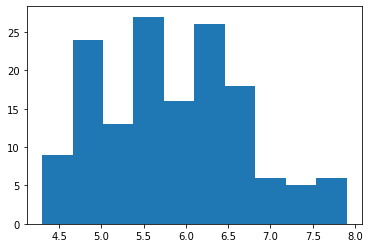

In [ ]:
import matplotlib.pyplot as plt

plt.hist(iris["sepal.length"])
plt.show() 

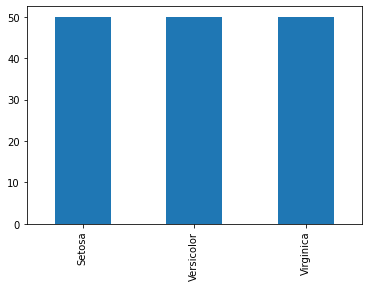

In [ ]:
iris["variety"].value_counts().plot(kind="bar")

###Seosed: hajuvusdiagramm

##Andmete eeltöötlus

###Andmete puhastamine

Masinõppe mudeli kvaliteet sõltub selle mudeli loomiseks kasutatud andmete kvaliteedist. Reaalses elus on andmed tihti ebatäielikud või vigased. Näiteks võib mõne kirje puhul olla puudu mõni tema tunnuse väärtusest, mis võib mingitel põhjustel olla mõõtmata. Masinõppe mudelid aga vajavad, et tunnuste väärtused oleks täielikult määratud, muidu võib algoritm katki minna. Andmete puhastamiseks on mitu võimalust. 
<ul>
  <li>
    Lihtsam võimalus on puuduvate tunnuste väärtustega read eemaldada, kuid kui mõne üksiku väärtuse puudumisega ridu on palju ja me eemaldame need kõik, kaotame me palju andmeid ja muud informatsiooni, mis andmerea teistel tunnustel oli olemas.
  </li>
  <li>
    Kui mingis tunnuses (veerus) on väga suur hulk puuduvaid väärtusi, siis võib ka vastava veeru eemaldada.
  </li>
  <li>
  Kolmas võimalus on mitte andmeid eemaldada, vaid hoopis asendada.
  <ul>
    <li>
    Arvuliste tunnuste puuduvad väärtused saaks näiteks asendada selle tunnuse kõikide väärtuste keskmisega. Sellisel viisil ei mõjuta see väärtus mudeli tööd olulisel viisil, kuna valitud väärtus on tunnuse väärtuste tasakaalupunktis.
    </li>
    <li>
      Kategoorse tunnuse puuduva väärtuse võib näiteks asendada selle tunnuse väärtustest kõige sagedamini esineva väärtusega.
    </li>
  </ul>
  </li>
</ul>

In [ ]:
#Uurime, kui mitu puuduvat väärtust iga tunnuse puhul leidub

iris.isna().sum()

sepal.length    0
sepal.width     1
petal.length    0
petal.width     0
variety         0
dtype: int64

In [5]:
#Puuduvate väärtuste asendamine keskväärtusega

iris = iris.fillna(iris.median().round(2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Vaatame uuesti puuduvaid väärtusi, neid ei tohiks enam olla

iris.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

###Kirjeldavate ja uuritavate tunnuste valik

Enne mudeli loomist on vaja välja selgitada, mida me täpselt uurida või ennustada tahame. Välja tuleb valida üks tunnus, mille väärtusi ma teiste tunnuste kaudu tahame ennustama hakata. Seda tunnust nimetatakse uuritavaks tunnuseks. Uuritava tunnuse tüüp määrab ära, milliselt tüüpi masinõppe mudeleid me rakendada saame: kui uuritav tunnus on arvulist tüüpi, siis saame rakendada regressiooni tüüpi mudeleid, ja kui uuritav tunnus on kategoorset tüüpi, siis saame rakendada klassifitseerimise mudeleid. 

In [6]:
X = iris[["sepal.length"]]
y = iris["sepal.width"]

###Tunnuste standardiseerimine, normaliseerimine

Tihti on mingi andmestiku erinevate tunnuste väärtused väga erinevates suurusvahemikes. Näiteks inimese pikkus meetrites varieerub enamjaolt 1-2m vahel, kuid inimeste kaalud varieeruvad arvuliselt suuremas vahemikus, nt 20-120kg. Ilmselt tuleneb see sellest, et erinevad tunnused on väljendatud erinevates mõõtühikutes ning pole teineteisega otseselt võrreldavad. Veel enam, võime inimeste pikkused esitada meetrite asemel millimeetrites, mistõttu on nüüd hoopis pikkuste varieeruvus arvuliselt suurem. Sellised tunnuste väärtuste suured erinevused võivad aga paljusid masinõppe algoritme hakata oluliselt mõjutama. Näiteks võib mingi mudeli parameetrite määramisel hakata suuremate väärtustega tunnused teisi tunnuseid "domineerima" ehk üle kaaluma, kuigi reaalsuses me võib-olla tahame, et kõik tunnused oleks mudeli loomisel esialgselt võrdse tähtsusega. <br><br>

Lahendusena sellele probleemile on andmete eeltöötluse ühe tavapärase osana andmete standardiseerimine ja normaliseerimine. Andmete standardiseerimisel teisendatakse mingi tunnuse väärtuseid selliselt, et selle tunnuse väärtuse keskväärtus oleks 0 ning standardhälve oleks 1. Kõikide tunnuste väärtuseid standardiseerides on neid võimalik viia samale mõõtkavale, mis on mõnede masinõppe algoritmide jaoks sobivam. 

In [ ]:
from sklearn import preprocessing

X_normalized = preprocessing.normalize(iris[['Size(sqf)', 'Floor']], norm='l2')

X_normalized

scaler = preprocessing.StandardScaler().fit(iris[["YrSold"]])
X_scaled = scaler.transform(iris[["YrSold"]])

KeyError: ignored

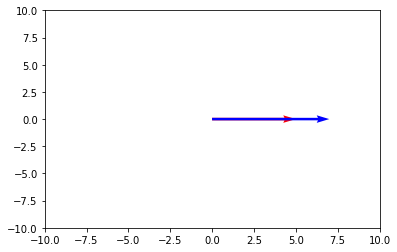

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
pts = np.array([[0,0], [0,0]])
end_pts = np.array([[5,0], [7,0]])
diff = end_pts - pts

plt.xlim([-10,10]) #<-- set the x axis limits
plt.ylim([-10, 10])

plt.quiver(pts[:,0], pts[:,1], diff[:,0], diff[:,1],
           angles='xy', scale_units='xy', scale=1., color=["r", "b"])

plt.show()

###Tunnuse kodeerimine

Masinmõppe mudelid suudavad tegutseda ainult arvuliste väärtustega. Mida aga teha kategoorsete tunnuste väärtustega? Tuleb teha tunnuste väärtuste kodeerimist. 

Sildistamine: olgu meil näiteks kategoorne tunnus "silmavärv", mille väärtused on nt ["sinine", "pruun", "roheline"]. Võime asendada iga silmavärvi mingi arvuga, nt sinine=1, pruun=2, roheline=3, siis saame tunnuse järjendiks [1, 2, 3]. Sildistamine aga ei ole hea valik, kui kategoorse tunnuse väärtuste vahel pole loomulikku järjestust ega võrdlust, kuna mudel võib hakata nende arvulisi tähistusi omavahel võrdlema (kuna arve saab teineteisega võrrelda) kohal, kus tegelikku võrdlust ei ole. Sildistamist on otstarbekam kasutada selliste kategoorsete tunnuste korral, mille väärtused on omavahel võrreldavad. Olgu näiteks üheks tunnuseks "hinnang" (nt oma tervisele), mille väärtused on ["väga halb", "halb", "keskmine", "hea", "väga hea"]. Sellisel juhul on nende väärtuste vahel loomulik järjestus olemas, nt väga halb=1, ..., väga hea=1.

In [7]:
print(iris["variety"].to_numpy())

le = LabelEncoder()
le.fit(iris["variety"])

transformed = le.transform(iris["variety"])
print(transformed)

['Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'V

####One-Hot Encoding

Teine võimalus kategoorilise tunnuse väärtuste arvuliseks muutmiseks on selle tunnuse iga väärtuse jaoks luua eraldi tunnus, mille väärtused on kas õhe

In [8]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
one_hot = pd.get_dummies(iris['variety'])
# Drop column B as it is now encoded
df = iris.drop('variety',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df  

,sepal.length,sepal.width,petal.length,petal.width,Setosa,Versicolor,Virginica
0,4.7,3.0,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


##Mudeli loomine

##Regressioon

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


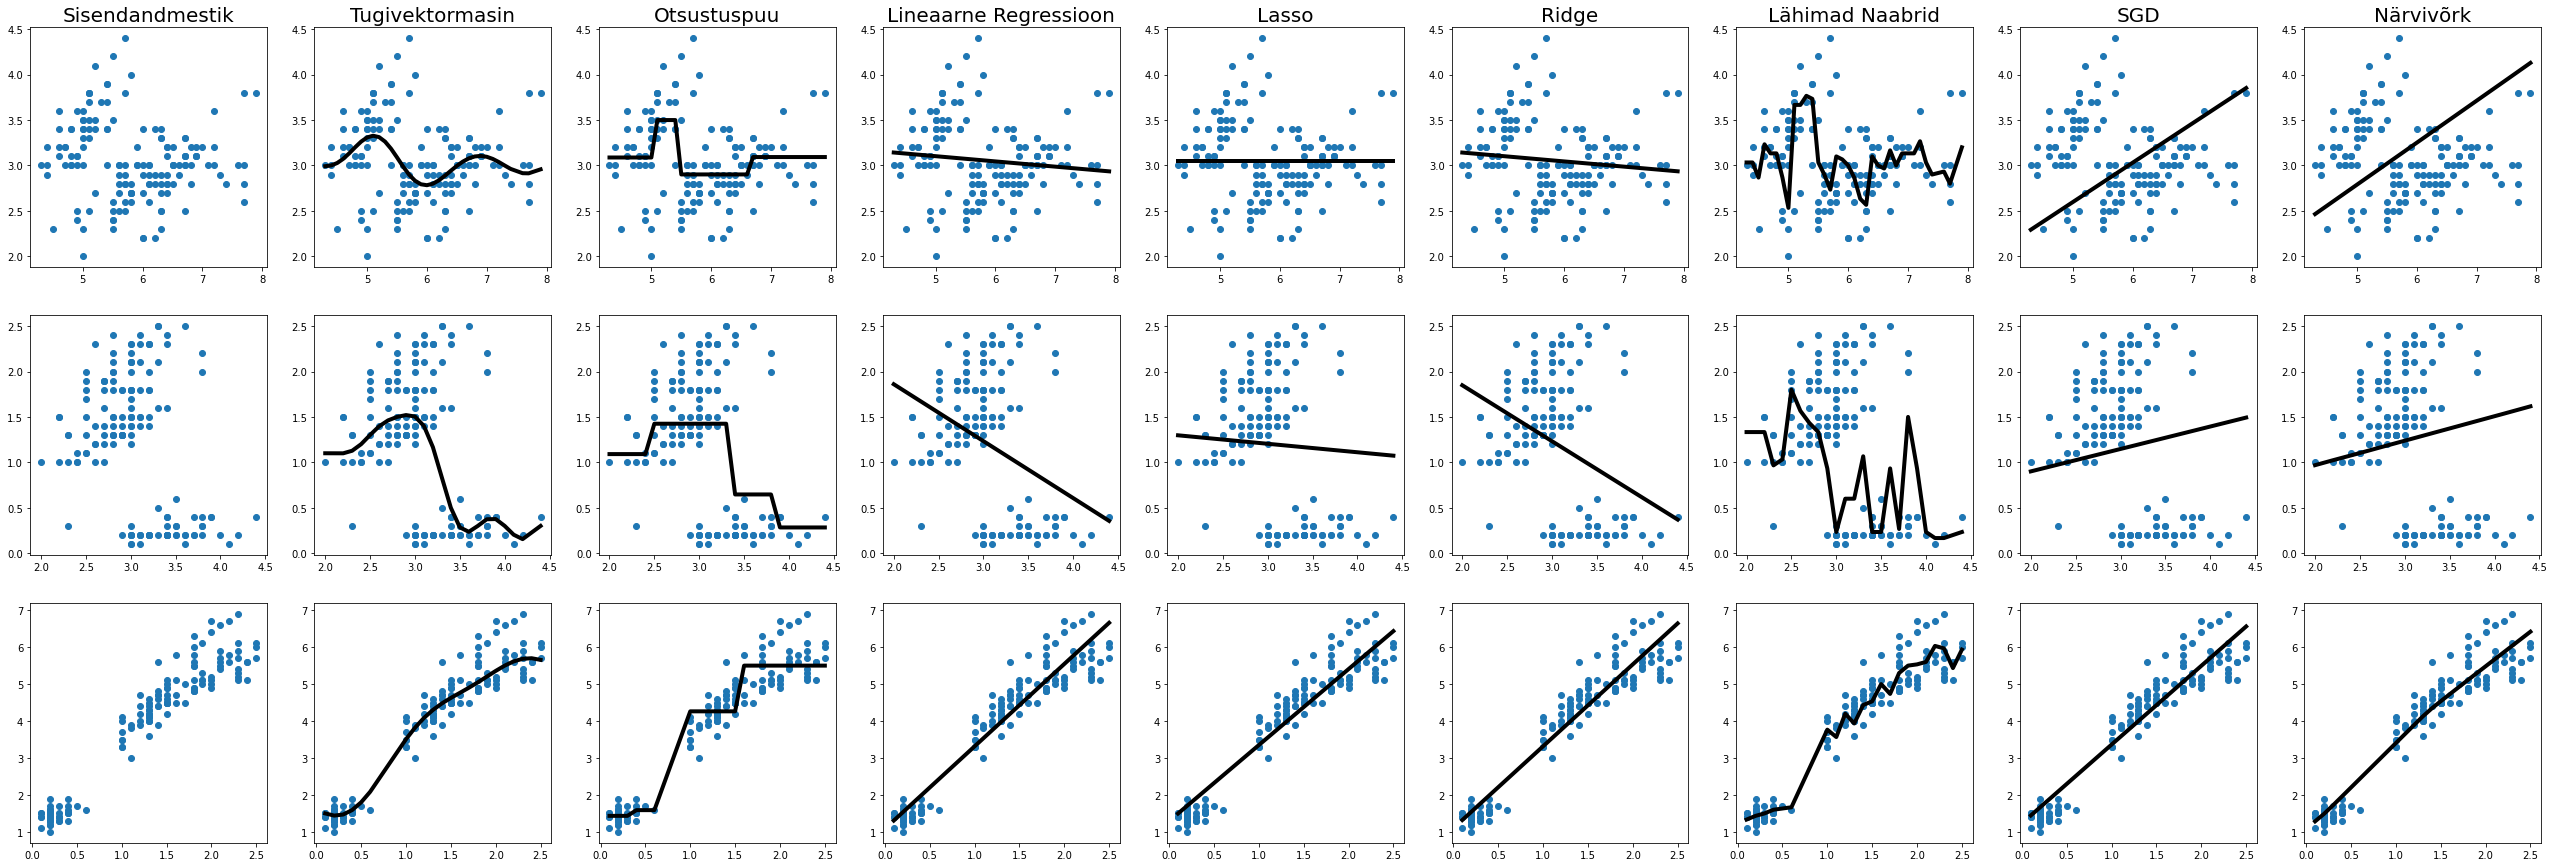

In [9]:
from sklearn import svm
from sklearn import linear_model
from sklearn import neighbors
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (45,15)

h = 3
w = 9
fig, axs = plt.subplots(h,w)



regr1 = svm.SVR()
regr2 = DecisionTreeRegressor(max_depth=2)
regr3 = linear_model.LinearRegression()
regr4 = linear_model.Lasso(alpha=0.1)
regr5 = linear_model.Ridge(alpha=.5)
regr6 = neighbors.KNeighborsRegressor(3, weights='uniform')
regr7 = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
regr8 = MLPRegressor(random_state=1, max_iter=1500)

models = [regr1,regr2, regr3, regr4, regr5, regr6, regr7, regr8]
names = ["Tugivektormasin", "Otsustuspuu", "Lineaarne Regressioon", "Lasso", "Ridge", "Lähimad Naabrid", "SGD", "Närvivõrk"]


predictions = []
X = iris[["sepal.length"]]
y = iris["sepal.width"]

for model in models:
  model.fit(X,y)
  predictions.append(model.predict(np.unique(X).reshape(-1,1)))

axs[0, 0].scatter(X, y)
axs[0, 0].set_title("Sisendandmestik", fontsize=20)
for i, pred in enumerate(predictions):
  axs[0, i+1].scatter(X, y)
  axs[0, i+1].set_title(names[i], fontsize=20)
  axs[0, i+1].plot(np.unique(X), pred, color='black', linewidth=4)

predictions = []
X = iris[["sepal.width"]]
y = iris["petal.width"]

for model in models:
  model.fit(X,y)
  predictions.append(model.predict(np.unique(X).reshape(-1,1)))

axs[1, 0].scatter(X, y)
for i, pred in enumerate(predictions):
  axs[1, i+1].scatter(X, y)
  axs[1, i+1].plot(np.unique(X), pred, color='black', linewidth=4)

predictions = []
X = iris[["petal.width"]]
y = iris["petal.length"]

for model in models:
  model.fit(X,y)
  predictions.append(model.predict(np.unique(X).reshape(-1,1)))

axs[2, 0].scatter(X, y)
for i, pred in enumerate(predictions):
  axs[2, i+1].scatter(X, y)
  axs[2, i+1].plot(np.unique(X), pred, color='black', linewidth=4)

Ülaloleval pildil on veidi näha erinevate regresiooni algoritmide iseloomu. Näiteks lineaarne regressioon, Lasso, Ridge ja SGD on lineaarsed, s.t nende regressiooni joon on sirgjoon, ja paremini nad andmeid lähendada ei saagi. Otsustuspuu võimaldab ka kõverjooni, aga tema joon on nurgeline. Nurgelisus sõltub otsustuspuu sügavusest. Tugivektormasina joon on aga palju sujuvam, sest tema mudel määratakse osaliselt polünoomide abil. 

Ühe uuritava ja ühe kirjeldava tunnuse (nagu ülevaloleval pildil) korral on võimalikku mudelit ja seost kujutada graafikuna, ning võimalikku seost vastavas punktiparves on võimalik ka lihtsalt silmaga näha. Kõik eelnevad masinõppe mudelid aga ei pea piirduma ainult kahe tunnusega, vaid võib modelleerida seoseid mistahes arvu tunnuste vahel, ning ka päriselus on vaja arvestada palju enam tunnuseid. N tunnuselise kirje visualiseerimiseks punktina (nagu eelneval pildil) oleks siis vaja meil näha N-mõõtmelist ruumi, mida me paraku ei näe, mistõttu on enam kui 2 või 3 mõõtmeliste andmete visualiseerimine arvutiekraanil raske. Küll aga ei sega suuremad andmete mõõtmed masinõppe algoritme. Nemad toimetavad ikka sama loogika alusel, nagu ka kahes mõõtmes, ning rohkemate tunnuste arvestamine veel enam parandab mudeli ennustustäpsust ja andmete lähendamisvõimet. 

##Klassifitseerimine

Allpool on kujutatud, kuidas valik erinevaid klassifitseerimisalgoritme sisendandmeid modelleerida üritab. Sisendandmeid on antud kolm komplekti (esimene veerg). Andmed jagunevad kahte klassi, mis on tähistatud sinise ja punase värviga. Ülejäänud veergudes on iga algoritmi loodud mudel kõigi kolme sisendandme komplekti puhul. Iga pildi all paremas nurgas on toodud vastava mudeli ennustustäpsus, nt .93 tähendab, et mudel ennustab uuele andmepunktile õige klassi (värvi) 93% juhtudest.

[2 0 0 0 1 0 1 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0
 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2
 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]
KNeighborsClassifier(n_neighbors=3)
GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))
DecisionTreeClassifier(max_depth=5)
RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)
MLPClassifier(alpha=1, max_iter=1000)
GaussianNB()
[2 0 0 0 1 0 1 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0
 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2
 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]
KNeighborsClassifier(n_neighbors=3)
GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))
DecisionTreeClassifier(max_depth=5)
RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)
MLPClassifier(alpha=1, max_iter=1000)
GaussianNB()
[2 0 0 0 1 0 1 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0
 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 

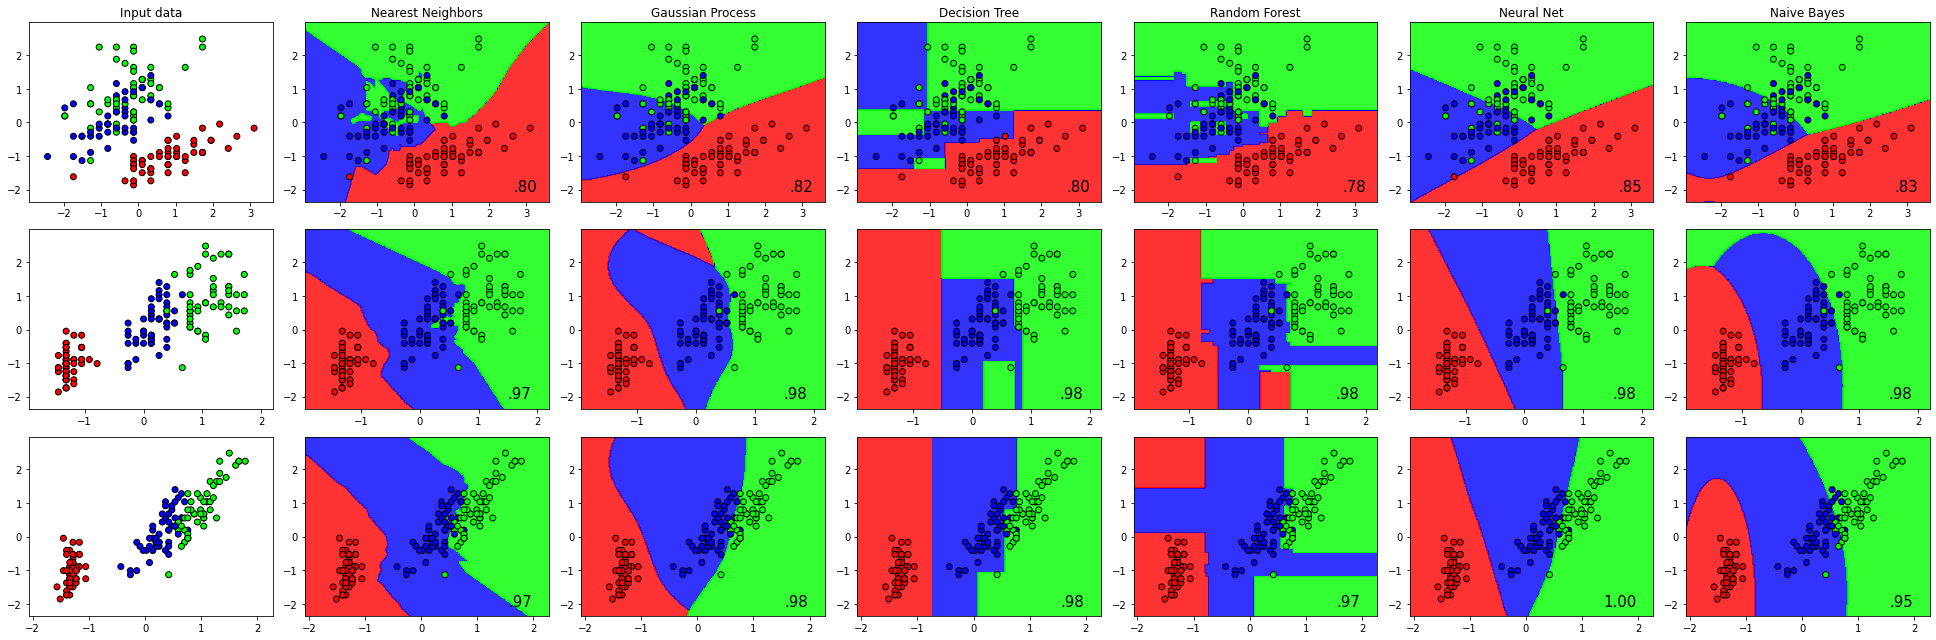

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

         
names = ["Nearest Neighbors", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    #SVC(kernel="linear", C=0.025),
    #SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    #AdaBoostClassifier(),
    GaussianNB(),
    #QuadraticDiscriminantAnalysis()
    ]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]
le = LabelEncoder()
le.fit(iris["variety"])
datasets = []
datasets.append((iris[["sepal.width", "sepal.length"]], le.transform(iris["variety"])))
datasets.append((iris[["petal.width", "sepal.length"]], le.transform(iris["variety"])))
datasets.append((iris[["petal.length", "sepal.length"]], le.transform(iris["variety"])))


figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)


    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    print(y_train)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=1,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #ax.set_xticks(())
    #ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        #if hasattr(clf, "decision_function"):
        #    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        #else:
        #    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])[:]

        print(clf)
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm_bright, alpha=0.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=1)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        #ax.set_xticks(())
        #ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

Ülevaloleval pildil on sinise ja punase värviga tähistatud nii andmepunktid kui ka mudeli õpitud "otsustuspiirid" ja "piirkonnad", s.t kõik uued punktid, mis langevad sinisesse (mida tumedam sinine või punane värvus, seda kindlam mudel oma ennustuses on) piirkonda, ennustatakse punasesse klassi, ning kõik uued punktid, mis langevad punasesse piirkonda, ennustatakse punasesse klassi kuuluvat. Esimese andmestiku puhul on näha, et sinised ja rohelised punktiparved kattuvad oluliselt, mis tähendab seda, et leidub nii ühtesid kui teisi lillede liike, mille "sepal.length" tunnuse väärtused on sarnases vahemikus, mistõttu on seda tunnust arvestades erinevaid lilli raske eristada. Selle tõttu on ka pea kõiki mudelite korral sellel andmestikul nende mudelite täpsus halven (80% - 83%). Teise ja kolmanda andmestiku andmepunktide on klassiti/värviti teineteisest suhteliselt hästi eraldatud (eriti punased punktid), mistõttu on ka mudelitel neid lihtsam eristada ning saavutad parema täpsuse.

###Mudeli valik ja parameetrite seadmine

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import numpy as np

X = iris[["sepal.length"]]
y = iris["sepal.width"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
#np.mean(cross_val_score(regressor, X, y, cv=10))

y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
r2_score(y_test, y_pred)
np.sqrt(mean_squared_error(y_test, y_pred))

0.4746431554336373

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


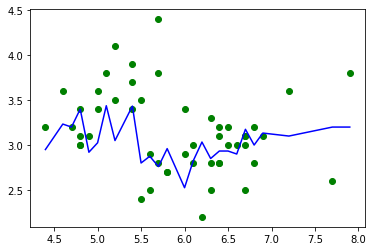

In [ ]:
plt.scatter(X_test, y_test,color='green')
plt.plot(np.unique(X_test).reshape(-1,1), regressor.predict(np.unique(X_test).reshape(-1,1)), color='blue')

plt.show()

In [ ]:
!pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.anaconda.org/scipy-wheels-nightly/simple


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

X = iris[["sepal.length"]]
y = iris["sepal.width"]

classifier = LogisticRegression().fit(X, y) 
disp = DecisionBoundaryDisplay.from_estimator(classifier, X, response_method="predict",
      xlabel="sepal.length", ylabel="sepal.width", alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.show()

ImportError: ignored

###Mudeli treenimine

Test- ja treenimisandmed </br>

Enne mudeli treenimist on meil vaja määrata andmehulk, mille peal me mudelit treenime. Etteruttavalt võib öelda, et pärast treenimist tuleb hinnata ka mudeli headust. Mudeli headust aga ei ole mõttekas hinnata täpselt samadel andmetel, millel me seda mudelit treenisime. Selle saavutamiseks eraldame me esialgsetest andmetest teatud hulga andmeid, mida me treenimisel ei kasuta, kuid mida kasutame hiljem mudeli ennustustäpsuse hindamiseks uutel andmetel. Tahame ju, et ka tulevikus ennustaks mudel meile väärtuste uute andmete jaoks, ning oleks nendes ennustused võimalikult täpsed.

###Mudeli hindamine

Regressioonmudelite hinnangud </br>
Klassifitseerimismudelite hinnangud </br>
Ristvalideerimine

##Mudeli tõlgendamine ja interpreeritavus

##Mudeli kasutamine